In [4]:
import numpy as np 
import pandas as pd

In [22]:
weather = pd.read_csv('weather_data.csv')
weather

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036


In [24]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [26]:
weather.isnull().sum()

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

In [28]:
weather.isnull().sum()

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

In [40]:
weather.rename(columns={'Temperature_C':'Temperature','Humidity_pct':'Humidity', 'Precipitation_mm':'Precipitation', 'Wind_Speed_kmh':'WindSpeed'},inplace=True)

In [42]:
weather.isnull().sum()

Location         0
Date_Time        0
Temperature      0
Humidity         0
Precipitation    0
WindSpeed        0
dtype: int64

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
weather[['Temperature', 'Humidity', 'Precipitation', 'WindSpeed']] = scaler.fit_transform(weather[['Temperature', 'Humidity', 'Precipitation', 'WindSpeed']])

In [56]:
weather['Date_Time'] = pd.to_datetime(weather['Date_Time'], errors='coerce')

In [58]:
weather['Year'] = weather['Date_Time'].dt.year
weather['Month'] = weather['Date_Time'].dt.month
weather['Hour'] = weather['Date_Time'].dt.hour
weather['Season'] = weather['Month'].apply(lambda x: (
    'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Fall'
))

In [60]:
print(weather['Date_Time'].head())

0   2024-01-14 21:12:46
1   2024-05-17 15:22:10
2   2024-05-11 09:30:59
3   2024-02-26 17:32:39
4   2024-04-29 13:23:51
Name: Date_Time, dtype: datetime64[ns]


In [ ]:
# Exploratory data analysis

<Axes: title={'center': 'Weather Trends Over Years'}, xlabel='Year'>

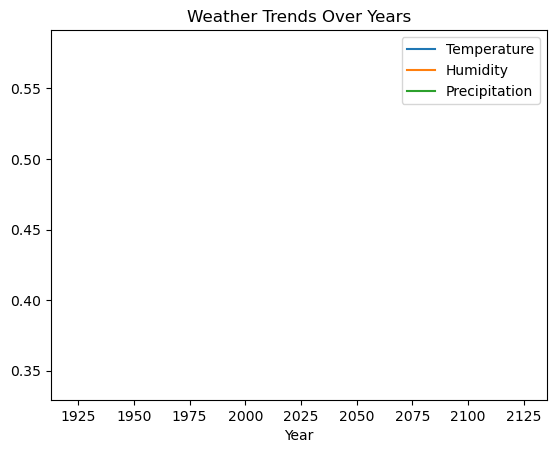

In [62]:
weather.groupby('Year')[['Temperature', 'Humidity', 'Precipitation']].mean().plot(title='Weather Trends Over Years')

In [64]:
weather.describe()

,Date_Time,Temperature,Humidity,Precipitation,WindSpeed,Year,Month,Hour
count,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000
mean,2024-03-10 10:40:58.896321792,0.579449,0.500364,0.341289,0.499920,2024.0,2.818458,11.475601
min,2024-01-01 00:00:06,0.000000,0.000000,0.000000,0.000000,2024.0,1.000000,0.000000
25%,2024-02-04 16:28:23.750000128,0.370840,0.250142,0.172372,0.249669,2024.0,2.000000,5.000000
50%,2024-03-10 11:43:28,0.579420,0.500312,0.341307,0.499792,2024.0,3.000000,11.000000
75%,2024-04-14 03:51:32.500000,0.787736,0.750731,0.508546,0.750471,2024.0,4.000000,17.000000
max,2024-05-18 19:44:10,1.000000,1.000000,1.000000,1.000000,2024.0,5.000000,23.000000
std,NaN,0.241500,0.288734,0.196906,0.288786,0.0,1.341235,6.917261


In [ ]:
# Correlation matrix

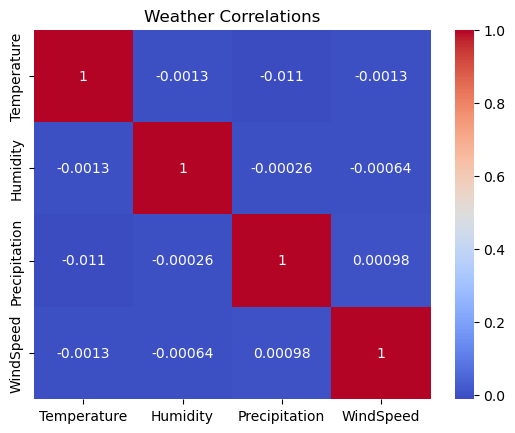

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = weather[['Temperature','Humidity','Precipitation','WindSpeed']].corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.title('Weather Correlations')
plt.show()

In [ ]:
# viaulizations

<Axes: title={'center': 'Average monthly Temperature'}, xlabel='Month'>

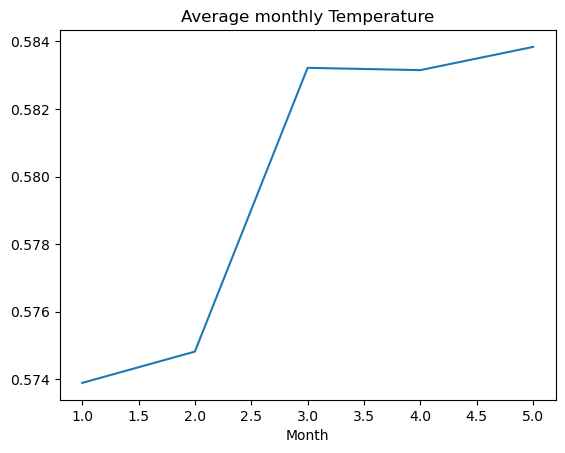

In [74]:
weather.groupby('Month')['Temperature'].mean().plot(kind='line',title='Average monthly Temperature')

<Axes: title={'center': 'Yearly Precipitation'}, xlabel='Year'>

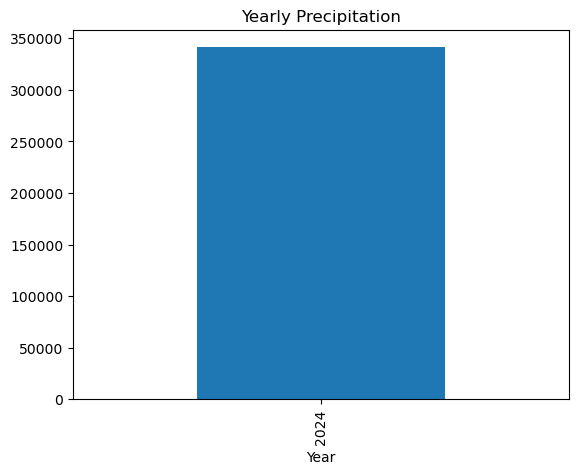

In [76]:
weather.groupby('Year')['Precipitation'].sum().plot(kind='bar', title='Yearly Precipitation')

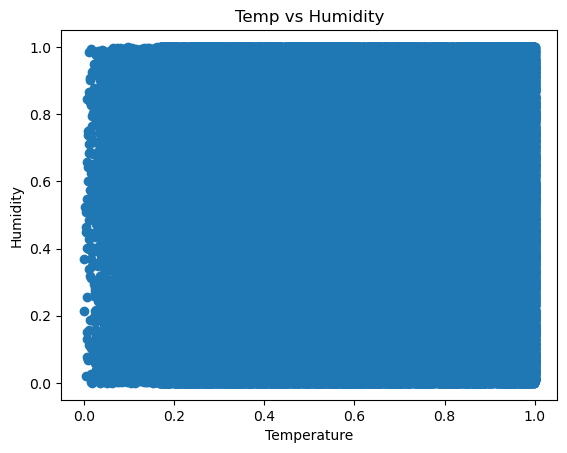

In [82]:
plt.scatter(weather['Temperature'],weather['Humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temp vs Humidity')
plt.show()

In [ ]:
# Forecasting and using linear regression

In [96]:
# Train a model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X= weather[['Year']]
y= weather['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Acuracy Evaluation 

In [98]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 0.05822754513124142, RMSE: 0.241303844004279


In [ ]:
# Predict future temperatures

In [100]:
future_years = pd.DataFrame({'Year': [2025, 2026, 2027, 2028]})
forecast = model.predict(future_years)
print(forecast)

[0.5791584 0.5791584 0.5791584 0.5791584]


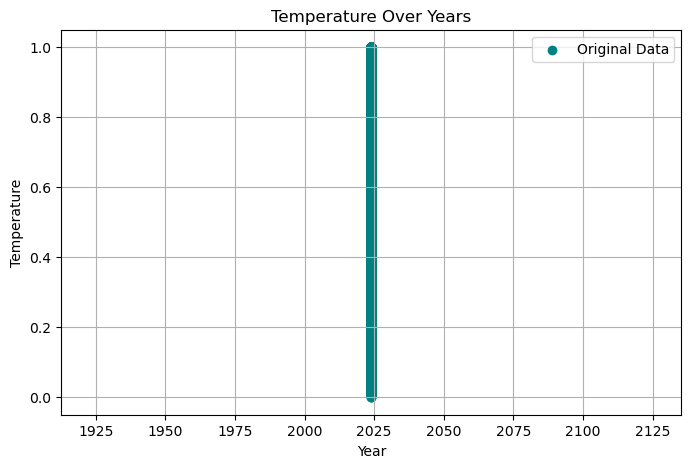

In [104]:
import matplotlib.pyplot as plt

# Assuming these are your variables
X = weather['Year']    # or whatever your year column is named
y = weather['Temperature']  # your temperature column

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='teal', label='Original Data')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over Years')
plt.legend()
plt.grid(True)
plt.show()